In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [99]:
df = pd.read_csv("data.csv")

In [100]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [101]:
df['Occupation']

0        Self_Employed
1              Retired
2              Student
3        Self_Employed
4         Professional
             ...      
19995    Self_Employed
19996          Student
19997     Professional
19998     Professional
19999     Professional
Name: Occupation, Length: 20000, dtype: object

In [102]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

In [103]:
import warnings
warnings.filterwarnings('ignore')

# EDA

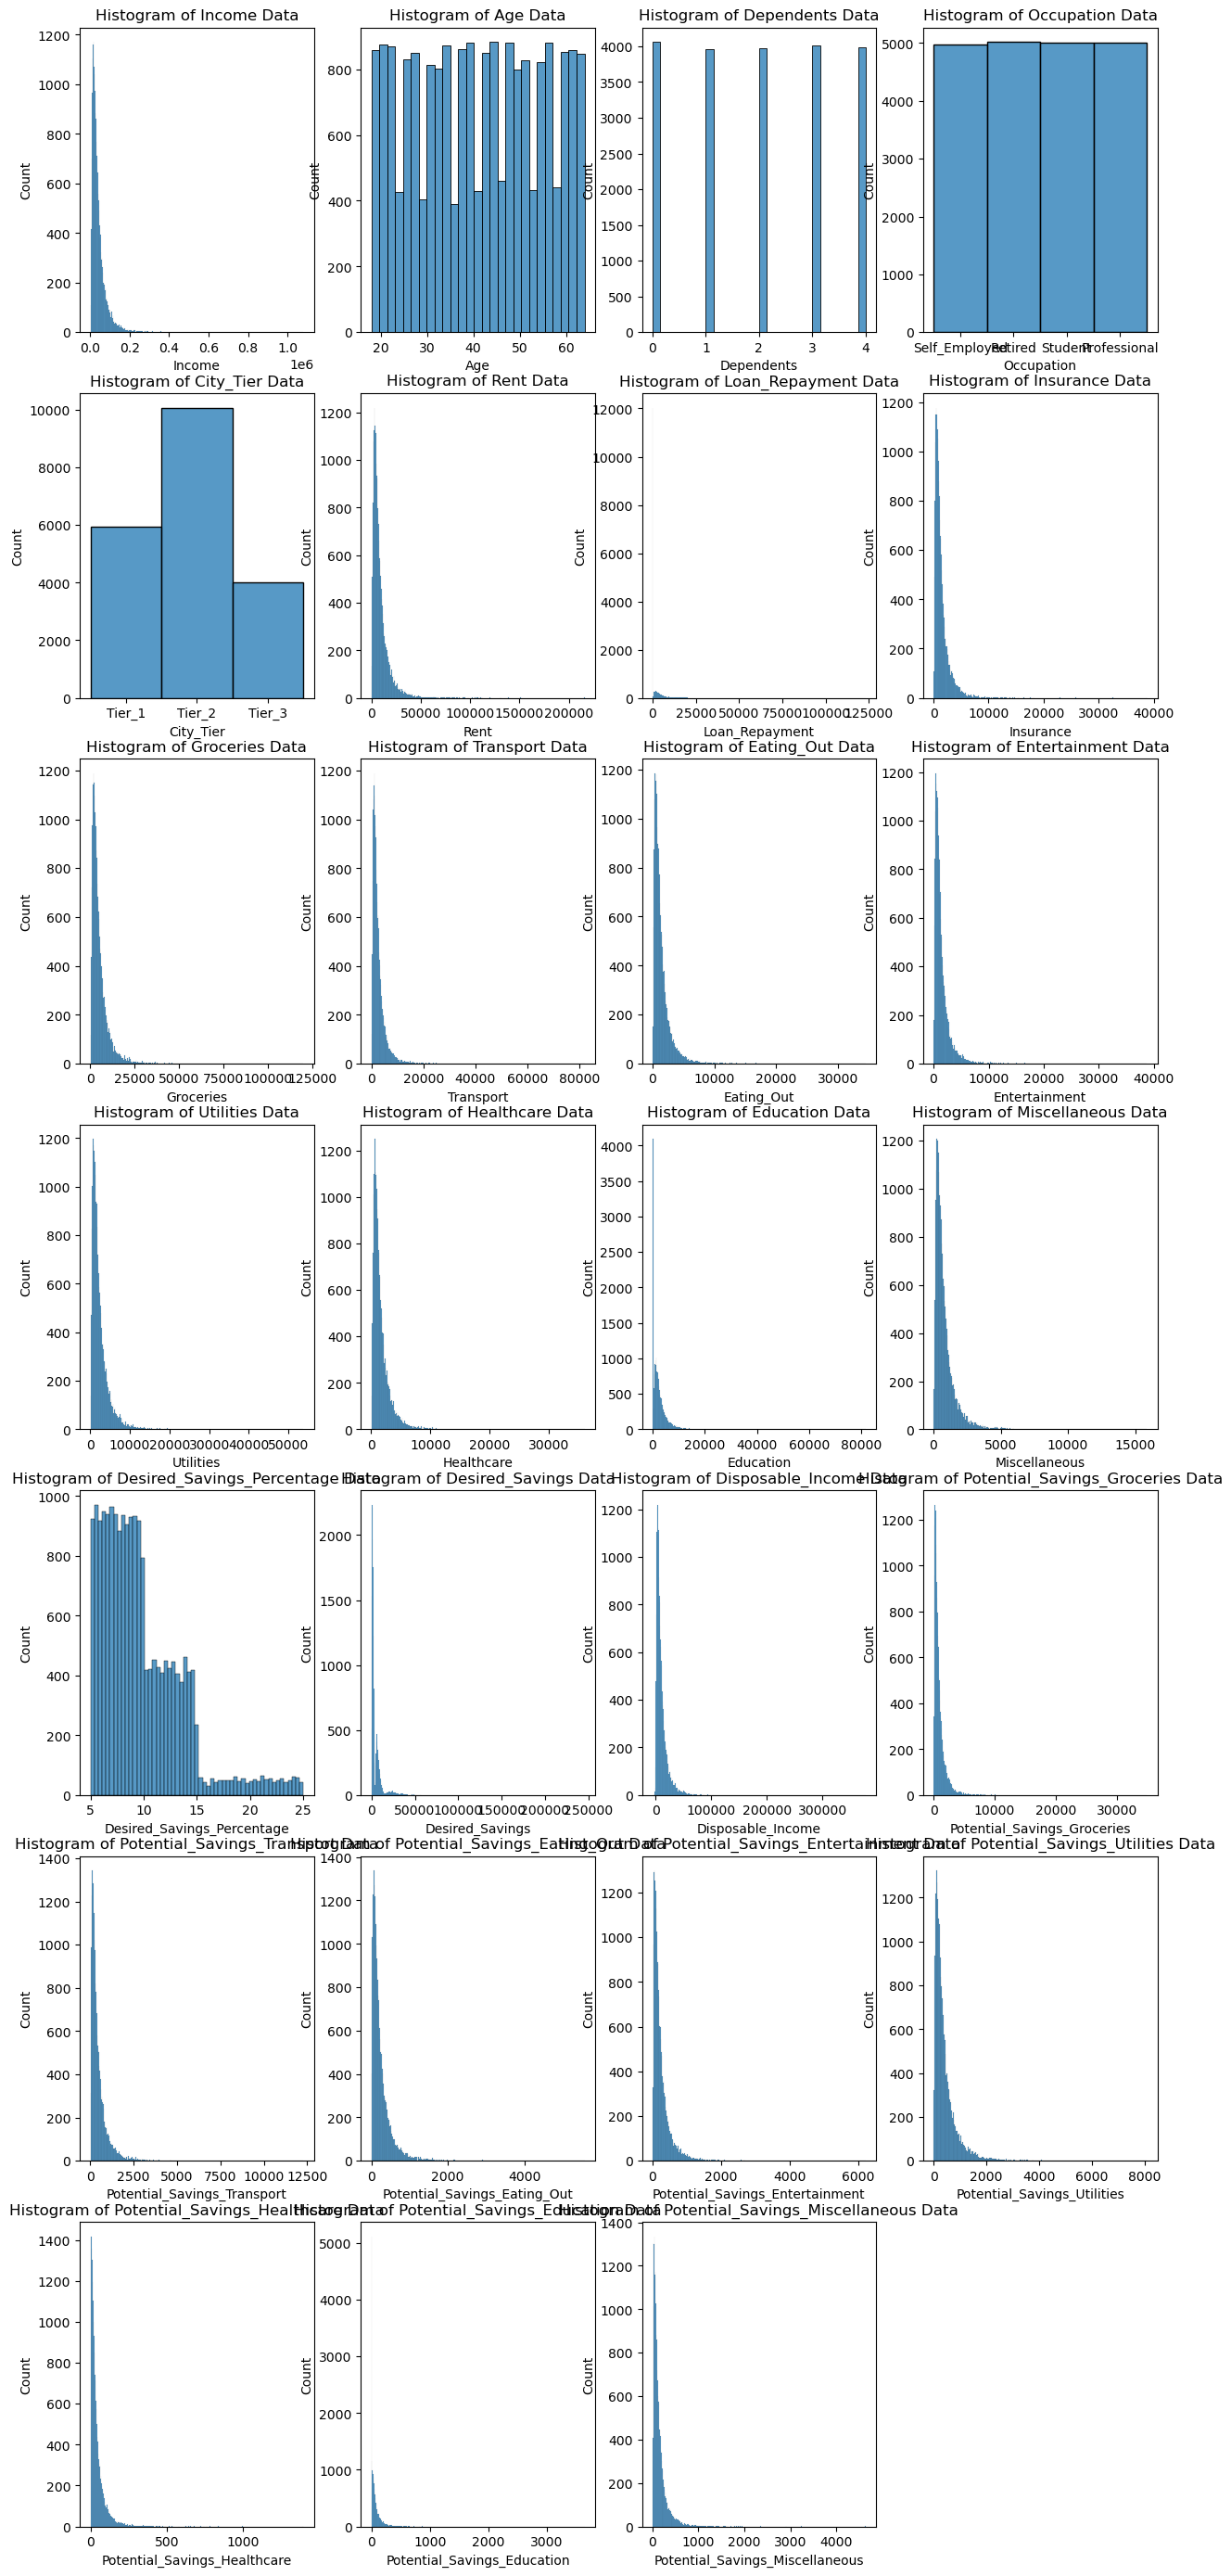

In [104]:
# Histogram of all feature
plt.figure(figsize = (15, 35))
for i, col in enumerate(df.columns, 1):
    plt.subplot(7, 4, i)
    sns.histplot(x = df[col])
    plt.title(f"Histogram of {col} Data")
    plt.plot()

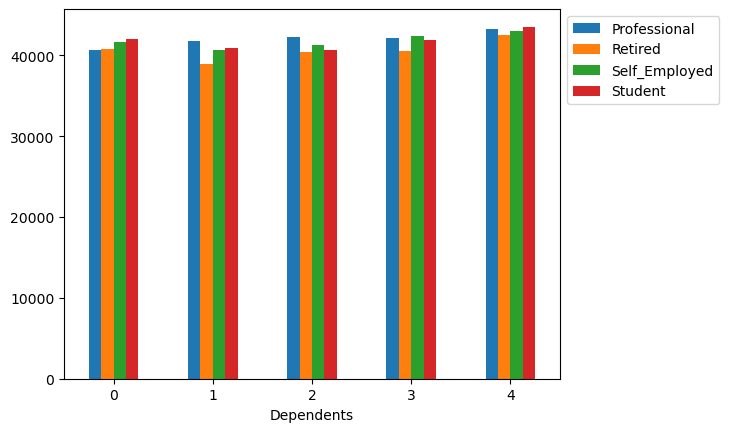

In [105]:
ax1 = df.pivot_table(index = "Dependents", columns = "Occupation", values = "Income", aggfunc = "mean").plot.bar(rot = 0)
ax1.legend(loc = "best", bbox_to_anchor = (1,1))
plt.show()

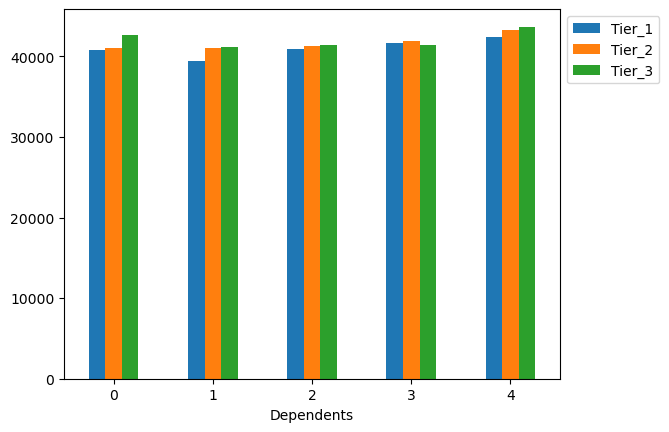

In [106]:
ax2 = df.pivot_table(index = "Dependents", columns = "City_Tier", values = "Income", aggfunc = "mean").plot.bar(rot = 0)
ax2.legend(loc = "best", bbox_to_anchor = (1, 1))
plt.show()

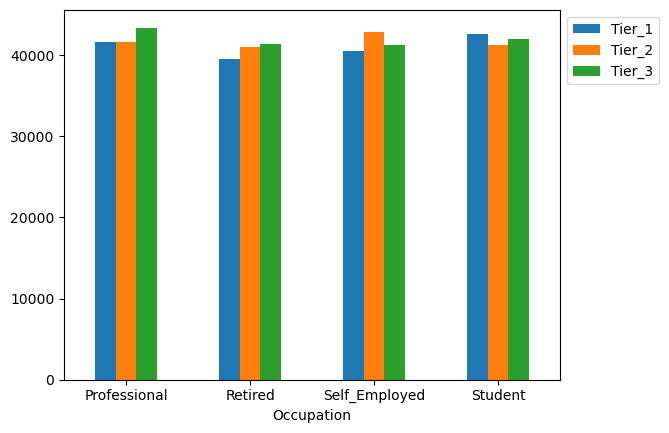

In [107]:
ax3 = df.pivot_table(index = "Occupation", columns = "City_Tier", values = "Income", aggfunc = "mean").plot.bar(rot = 0)
ax3.legend(loc = "best", bbox_to_anchor = (1, 1))
plt.show()

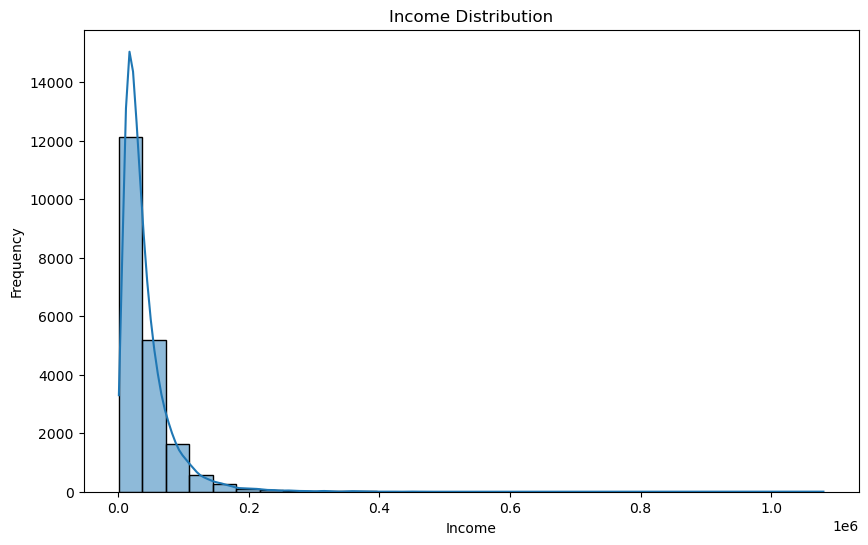

In [108]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

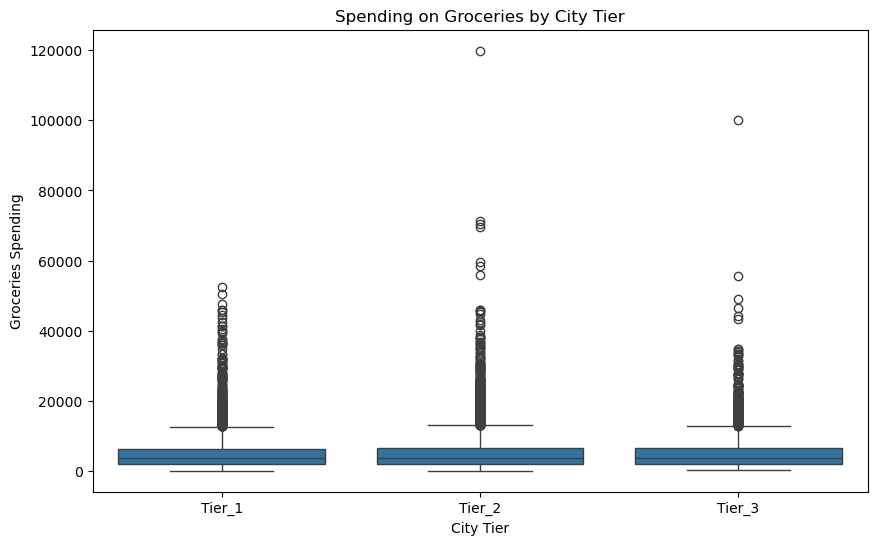

In [109]:
# Spending on Groceries by City Tier
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_Tier', y='Groceries', data=df)
plt.title('Spending on Groceries by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Groceries Spending')
plt.show()

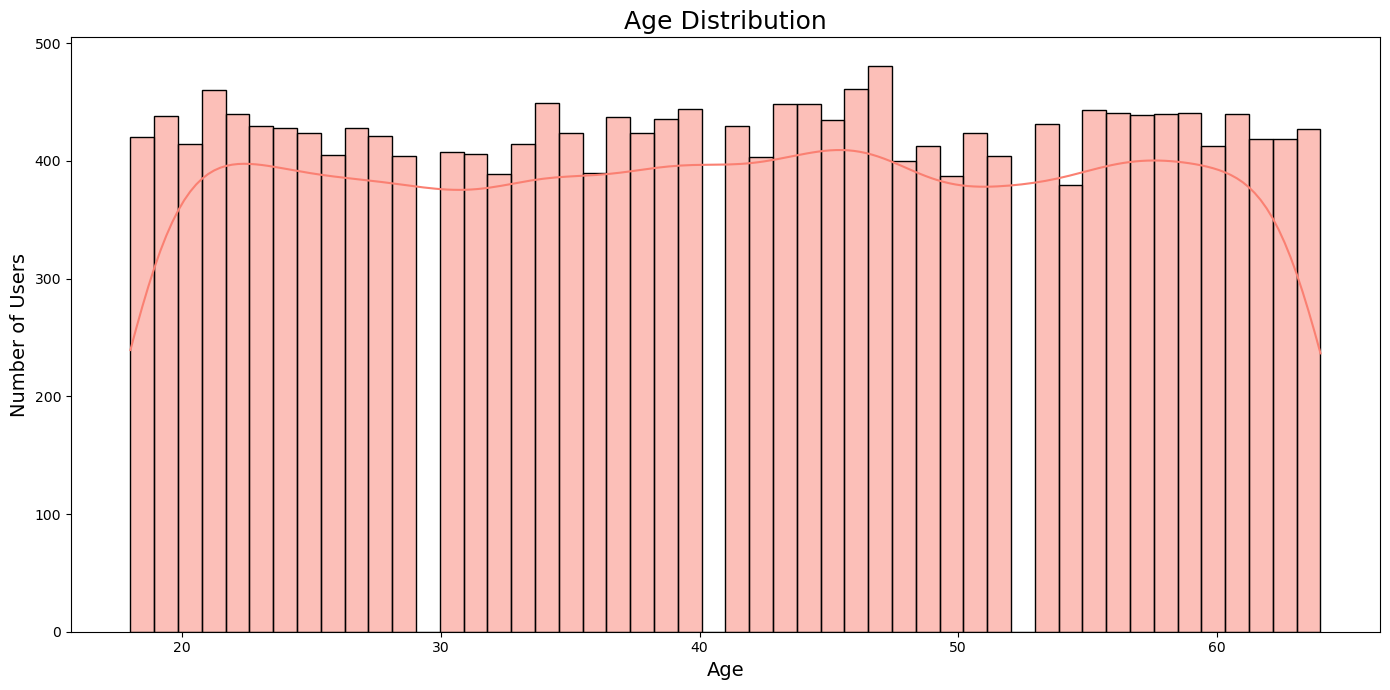

In [110]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Age'], bins=50, kde=True, color='salmon')
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

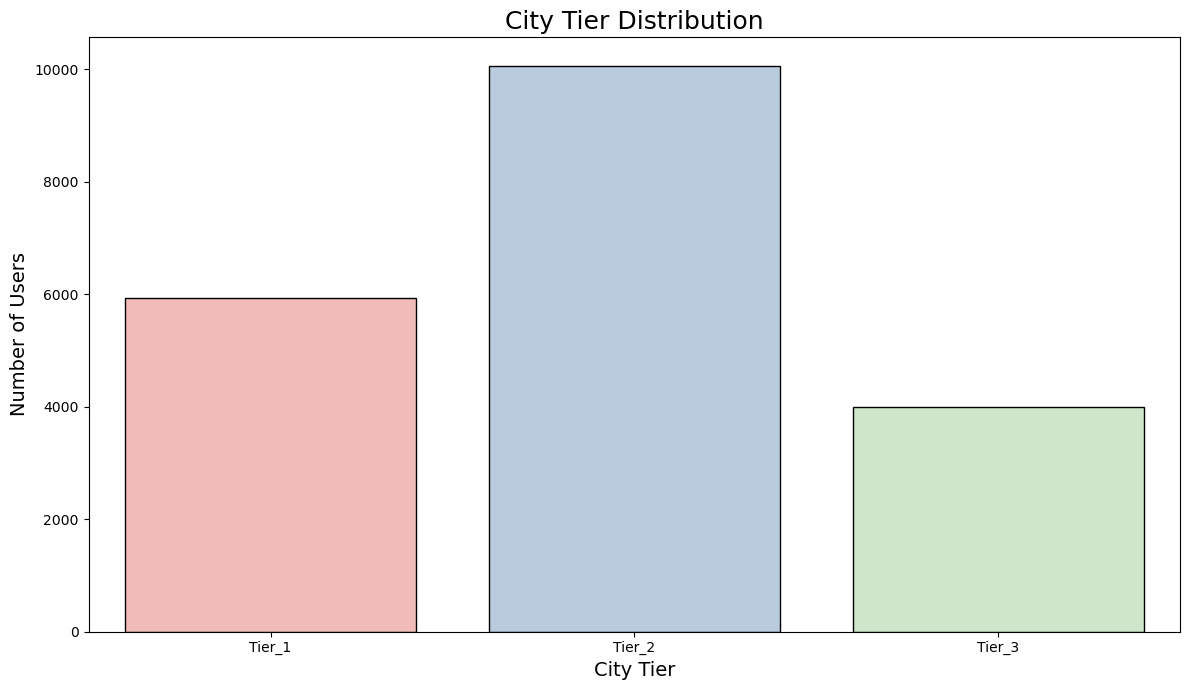

In [111]:
plt.figure(figsize=(12, 7))
sns.countplot(x='City_Tier', data=df, palette='Pastel1', edgecolor='black')
plt.title('City Tier Distribution', fontsize=18)
plt.xlabel('City Tier', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

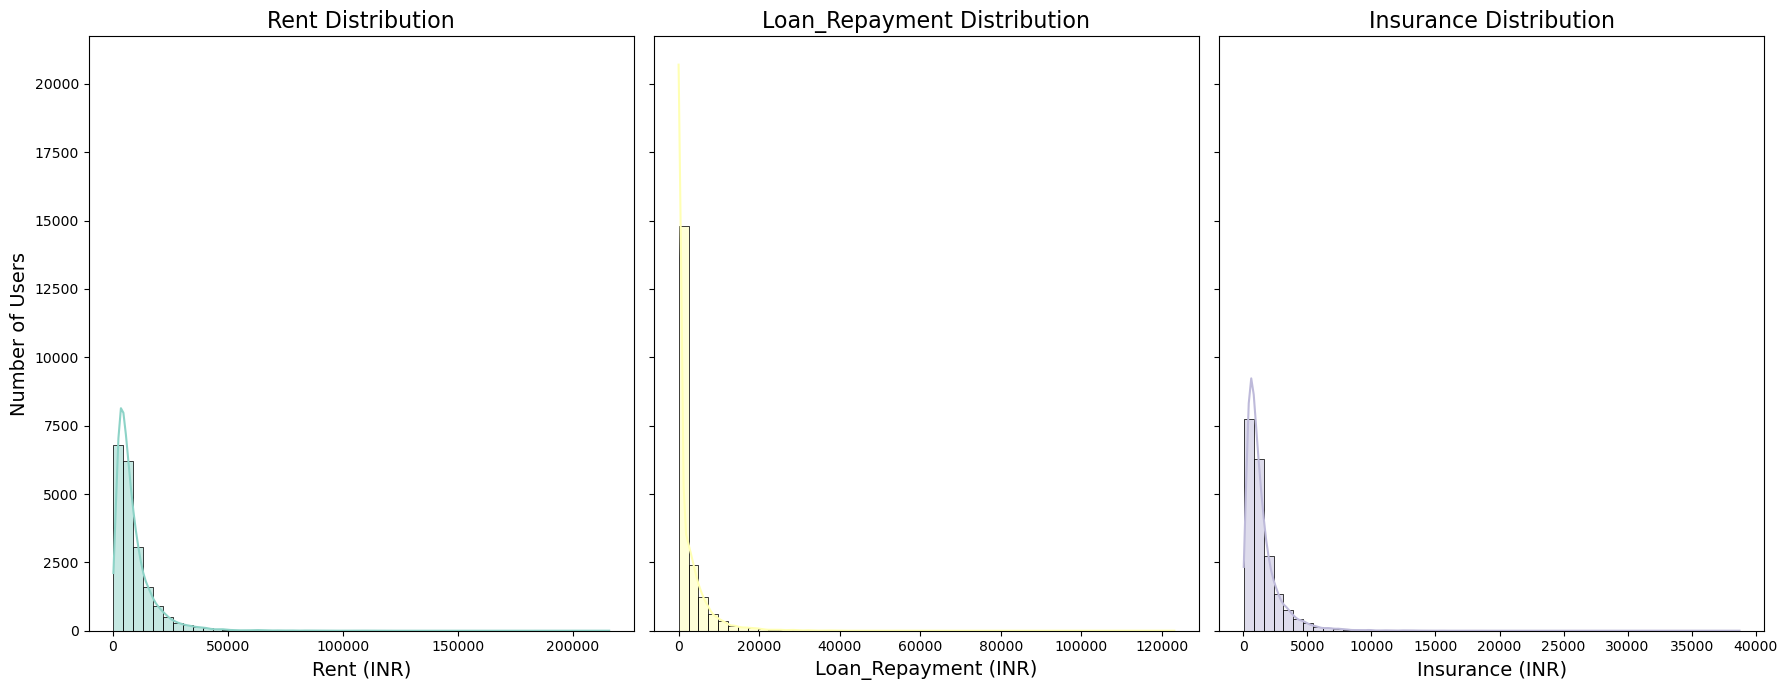

In [112]:
fixed_expenses = ['Rent', 'Loan_Repayment', 'Insurance']
num_fixed = len(fixed_expenses)

fixed_palette = sns.color_palette("Set3", num_fixed)

fig, axes = plt.subplots(1, num_fixed, figsize=(18, 7), sharey=True)

for ax, expense, color in zip(axes, fixed_expenses, fixed_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

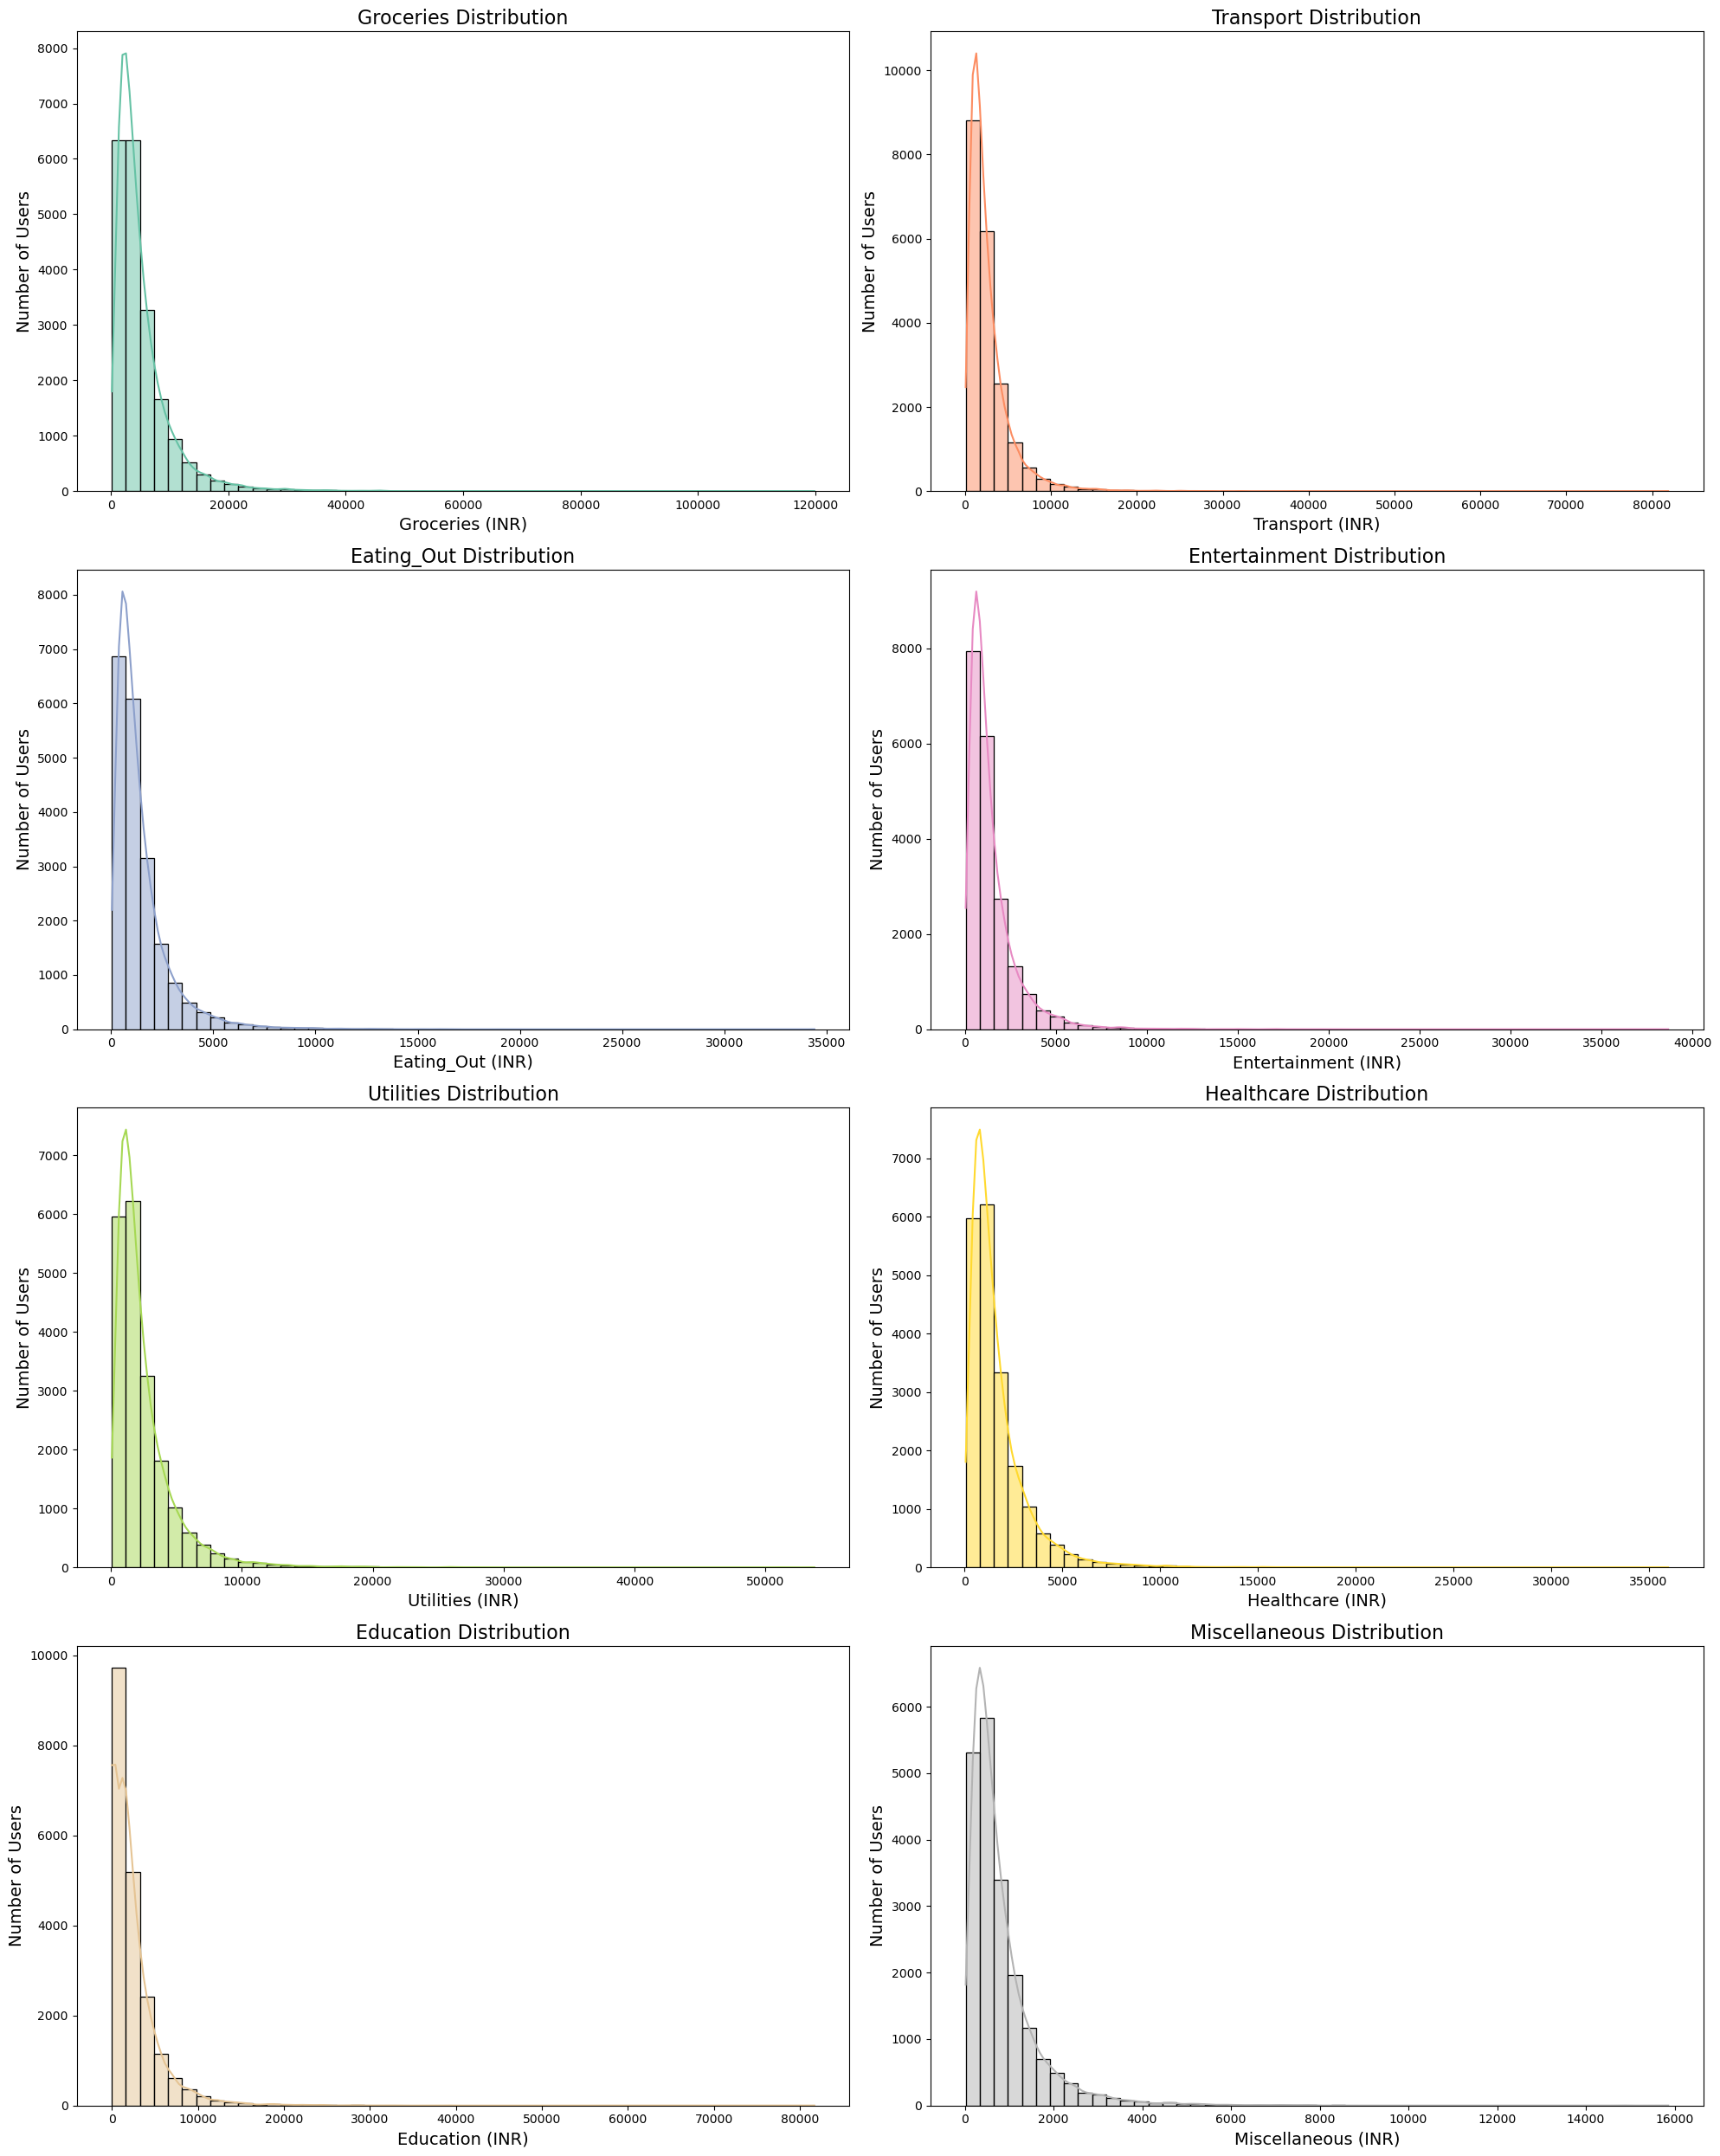

In [113]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]
num_variable = len(variable_expenses)

variable_palette = sns.color_palette("Set2", num_variable)

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

for ax, expense, color in zip(axes, variable_expenses, variable_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

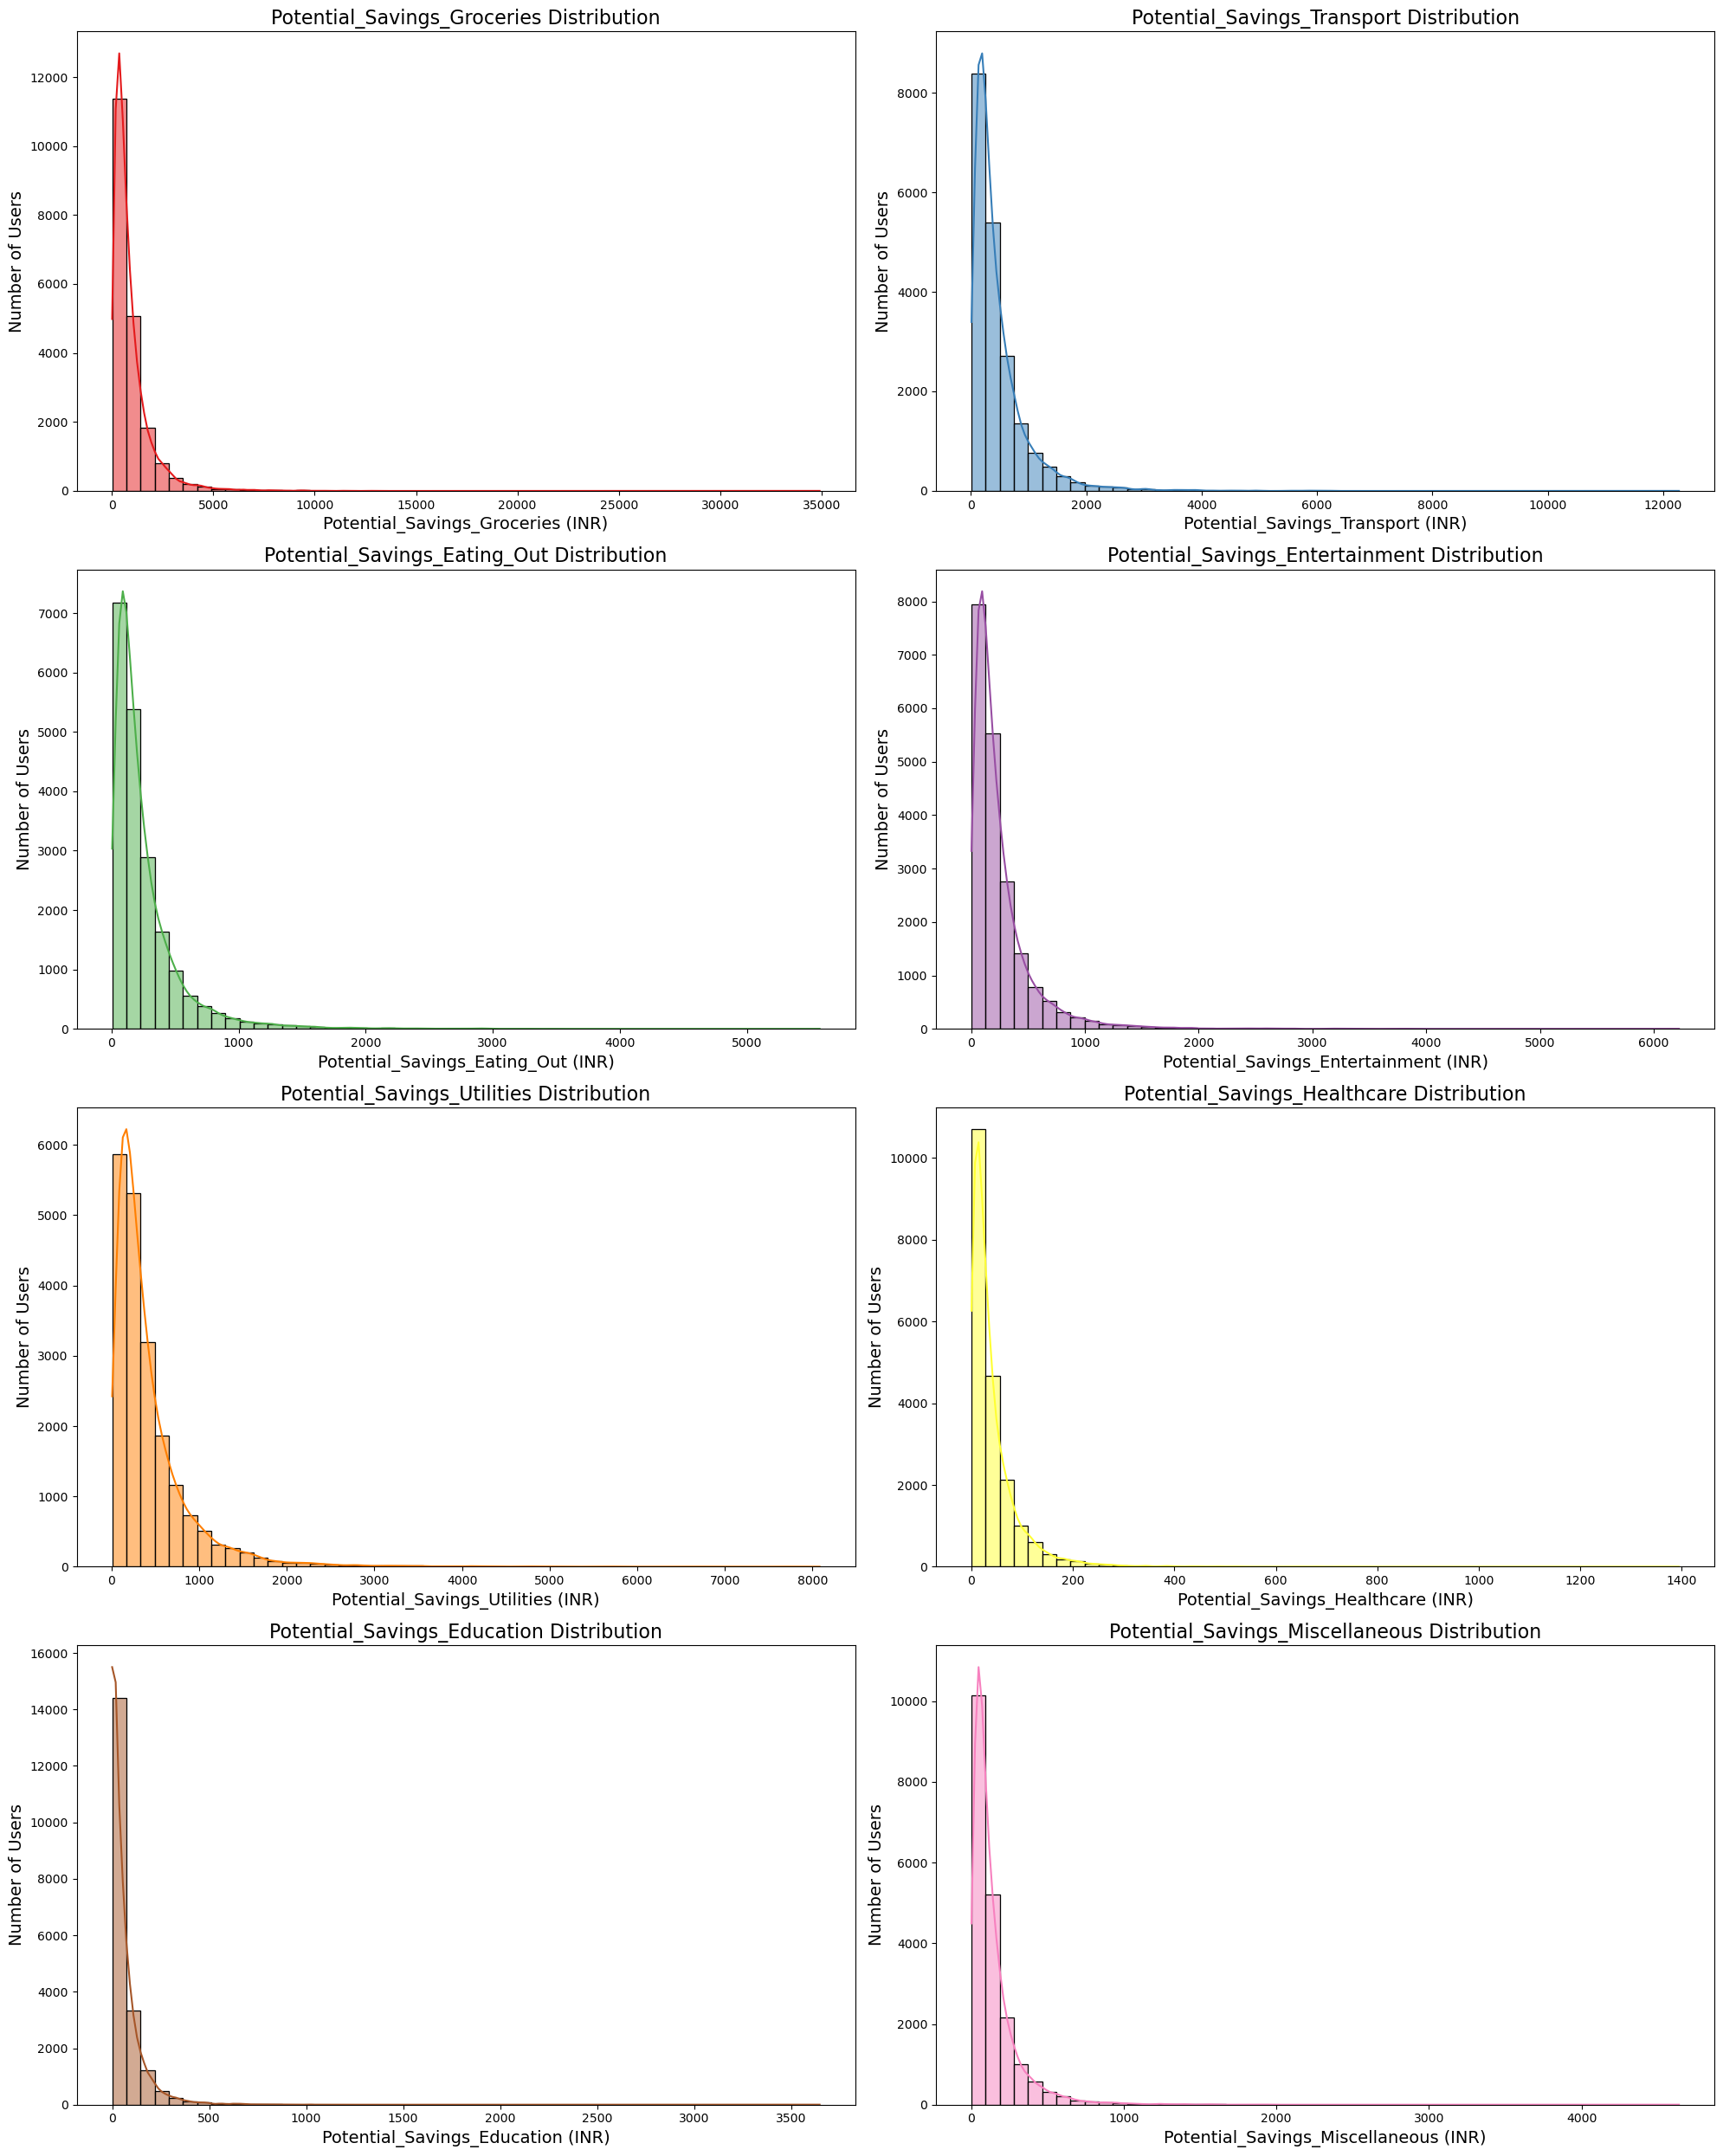

In [114]:
potential_savings_columns = [col for col in df.columns if col.startswith('Potential_Savings')]

num_potential = len(potential_savings_columns)
palette_potential = sns.color_palette("Set1", num_potential)

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

for ax, column, color in zip(axes, potential_savings_columns, palette_potential):
    sns.histplot(df[column], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{column} Distribution', fontsize=16)
    ax.set_xlabel(f'{column} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

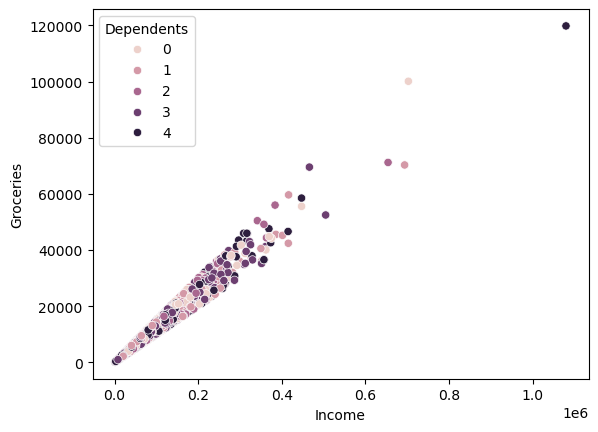

In [115]:
# Top correlation of target by "Dependents"
sns.scatterplot(x = df["Income"], y = df["Groceries"], hue = df["Dependents"])
plt.show()

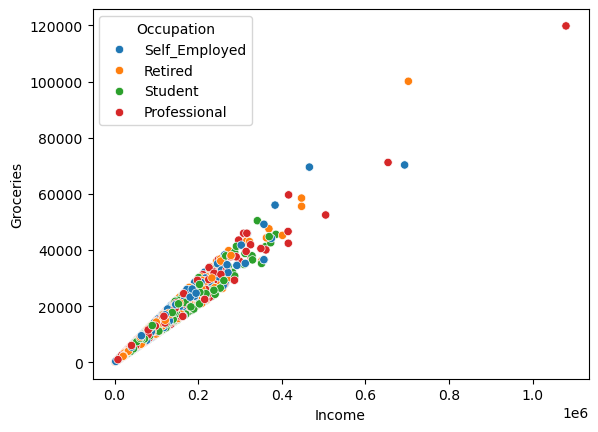

In [116]:
# Top correlation of target by "Occuptaion"
sns.scatterplot(x = df["Income"], y = df["Groceries"], hue = df["Occupation"])
plt.show()

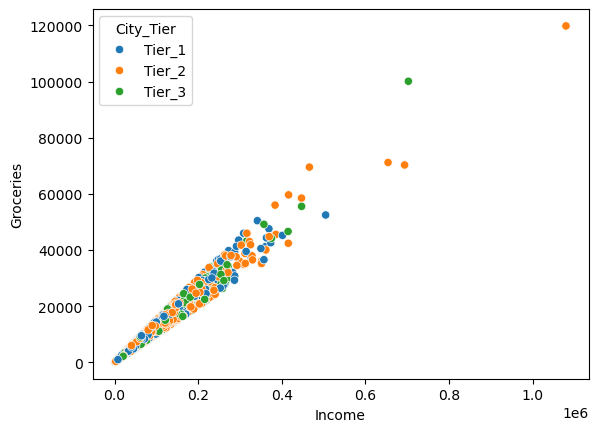

In [117]:
# Top correlation of target by "City_Tier"
sns.scatterplot(x = df["Income"], y = df["Groceries"], hue = df["City_Tier"])
plt.show()

# Correlation Analysis

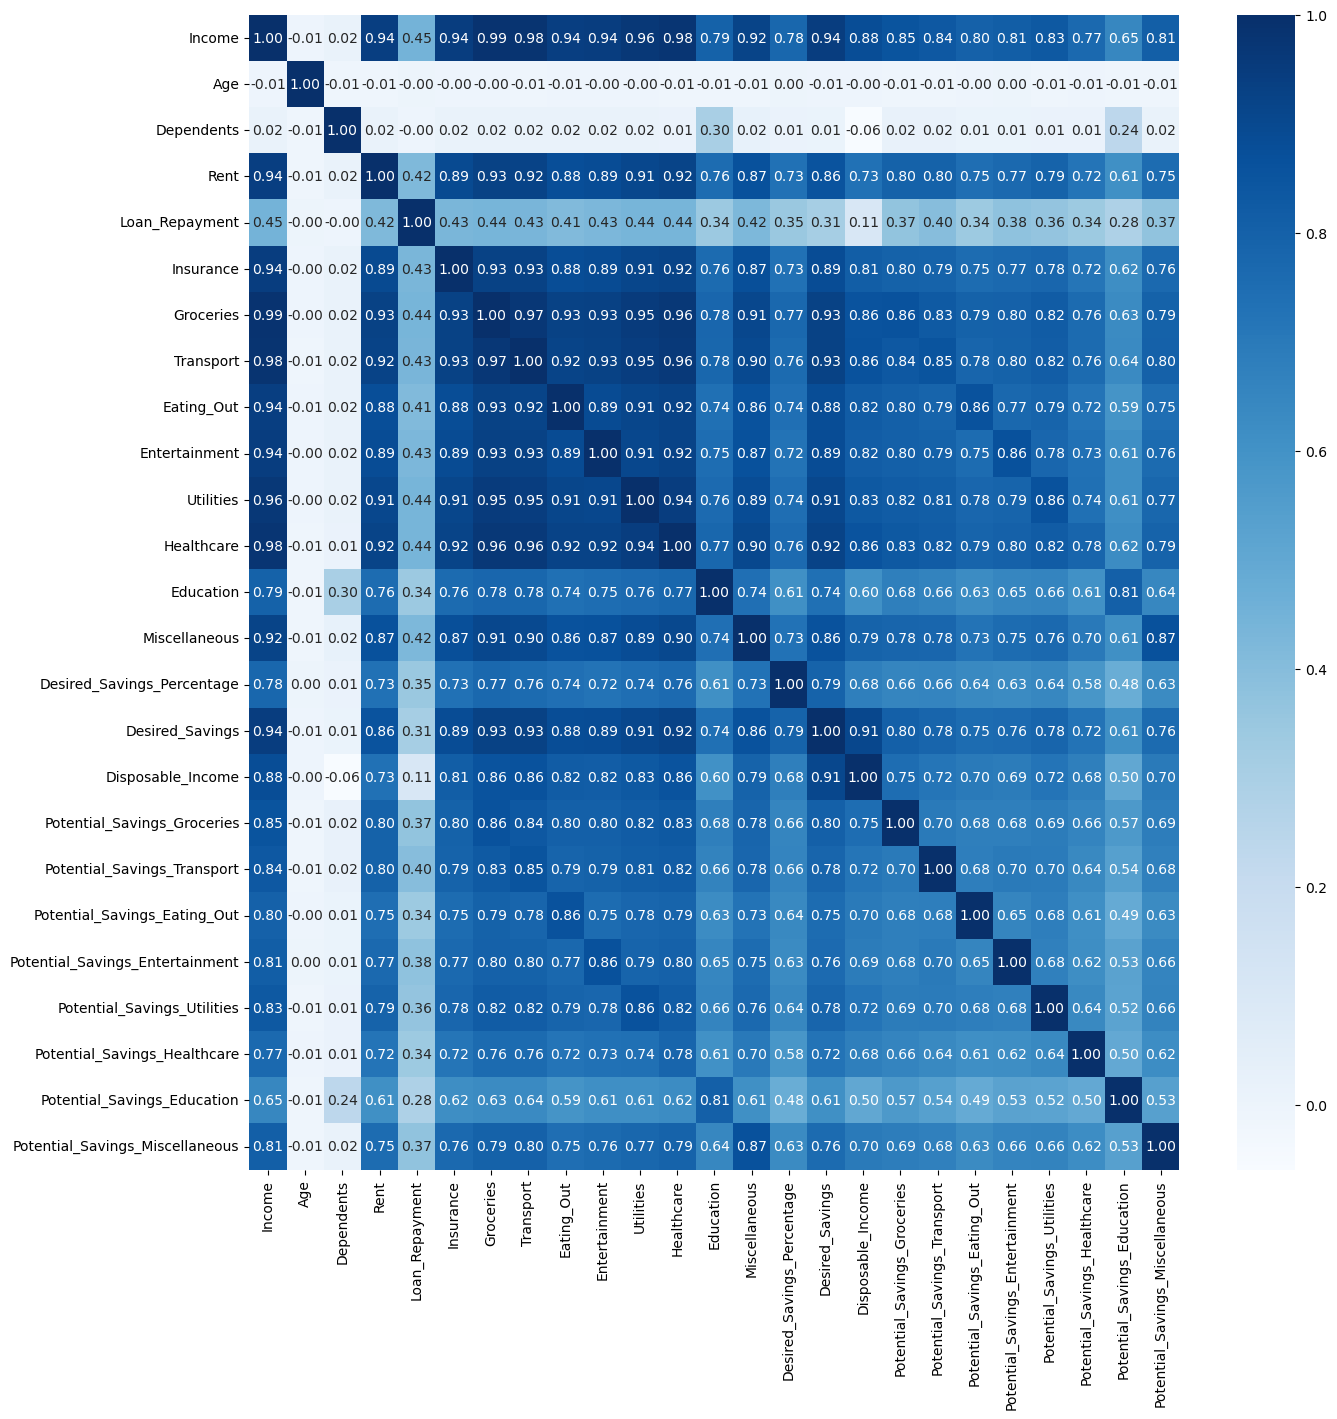

In [118]:
# This avoids the "could not convert string to float" error
df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, fmt=".2f", annot=True, cmap="Blues")
plt.show()

In [119]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Feature Selection

In [120]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]

target_columns = [f'Potential_Savings_{cat}' for cat in variable_expenses]

numerical_features = [
    'Income', 'Age', 'Dependents', 'Disposable_Income', 'Desired_Savings'
] + variable_expenses 

categorical_features = ['Occupation', 'City_Tier']

In [121]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_cat_columns = encoder.get_feature_names_out(categorical_features)

df_encoded_cats = pd.DataFrame(encoded_cats, columns=encoded_cat_columns)
df_features = pd.concat([df[numerical_features], df_encoded_cats], axis=1)

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(df_features[numerical_features])

df_scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_features, index=df_features.index)

df_features.update(df_scaled_numerical)

In [124]:
X = df_features

y = df[target_columns]

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

In [128]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.W = self.add_weight(
            name='att_weight', shape=(input_shape[-1], 1),
            initializer='normal', trainable=True
        )
        self.b = self.add_weight(
            name='att_bias', shape=(input_shape[1], 1),
            initializer='zeros', trainable=True
        )
        super(AttentionLayer, self).build(input_shape)
    
    def call(self, x):
        e = tf.matmul(x, self.W) + self.b
        e = tf.squeeze(e, -1)
        a = tf.nn.softmax(e)
        a = tf.expand_dims(a, -1)
        output = x * a
        return tf.reduce_sum(output, axis=1)

# Building the Attention Model

# # Define a Custom Attention

In [129]:
from tensorflow.keras.layers import Layer 
from tensorflow.keras import Input

In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Dropout, LayerNormalization, MultiHeadAttention,Layer, GlobalAveragePooling1D, Input,Reshape, Lambda,Attention
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Build the Model Architecture

In [131]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))

dense1 = Dense(128, activation='relu')(input_layer)
dropout1 = Dropout(0.3)(dense1)



reshaped = Reshape((128, 1))(dropout1)




attention_output = AttentionLayer()(reshaped)

dense2 = Dense(64, activation='relu')(attention_output)
dropout2 = Dropout(0.3)(dense2)
dense3 = Dense(32, activation='relu')(dropout2)

output_layer = Dense(len(target_columns), activation='linear')(dense3)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model Summary

In [132]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (None, 1)              │           129 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,033 (19.66 KB)

 Trainable params: 5,033 (19.66 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

# Dfine Callbacks

In [133]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6
)

# Train the model

In [134]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 391258.5000 - mae: 322.3093 - val_loss: 323368.8438 - val_mae: 266.5104 - learning_rate: 0.0010
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 234361.3438 - mae: 229.2657 - val_loss: 126820.1172 - val_mae: 168.3284 - learning_rate: 0.0010
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91916.7031 - mae: 155.4081 - val_loss: 108959.9375 - val_mae: 157.0932 - learning_rate: 0.0010
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80373.2188 - mae: 142.9501 - val_loss: 107047.8516 - val_mae: 153.6417 - learning_rate: 0.0010
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79815.5625 - mae: 140.8030 - val_loss: 101827.2578 - val_mae: 147.8467 - learning_rate: 0.0010
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73921.9922 - mae: 137.5212 - val_loss: 101813.5312 - val_mae: 146.6498 - learning_rate: 0.0010
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7

# Evaluation the Model

In [135]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95864.1406 - mae: 143.8176
Test Loss: 98702.1250
Test MAE: 141.2462


# Plot Training History

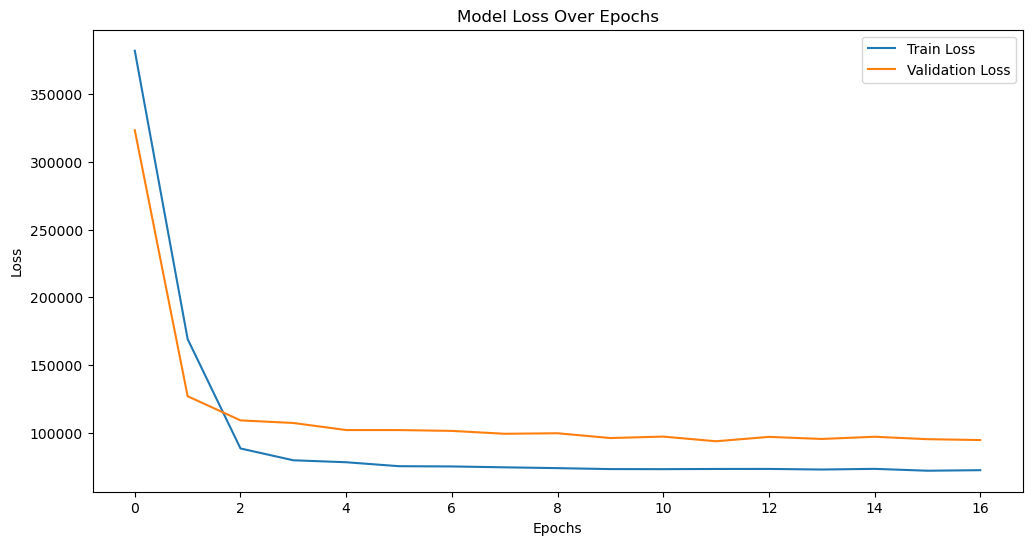

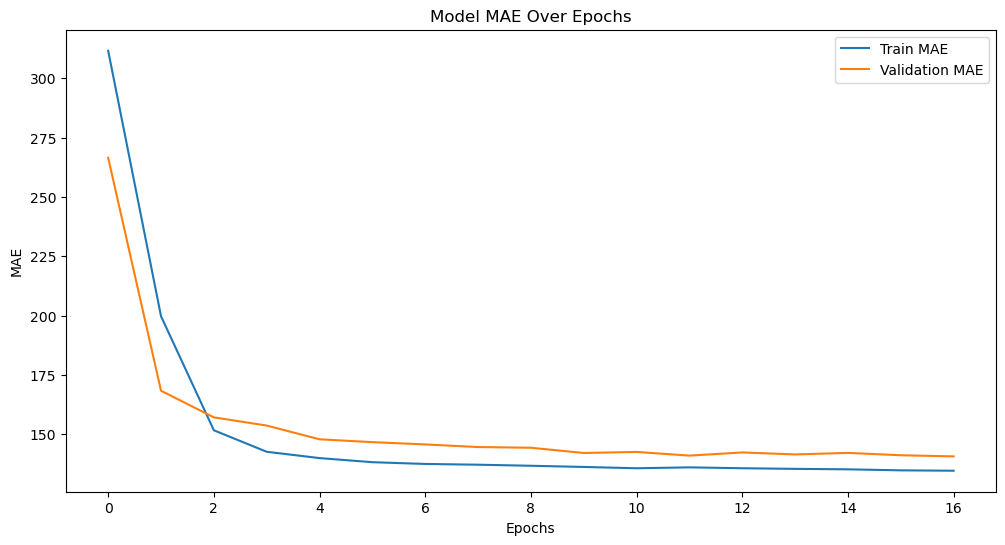

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Analysis Predictions

In [137]:
y_pred = model.predict(X_test)

y_test_df = pd.DataFrame(y_test, columns=target_columns).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

from sklearn.metrics import mean_absolute_error

mae_per_category = {}
for col in target_columns:
    mae = mean_absolute_error(y_test_df[col], y_pred_df[col])
    mae_per_category[col] = mae
    print(f"MAE for {col}: {mae:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
MAE for Potential_Savings_Groceries: 385.1077
MAE for Potential_Savings_Transport: 200.8353
MAE for Potential_Savings_Eating_Out: 112.4121
MAE for Potential_Savings_Entertainment: 109.6540
MAE for Potential_Savings_Utilities: 186.1697
MAE for Potential_Savings_Healthcare: 22.5982
MAE for Potential_Savings_Education: 46.8135
MAE for Potential_Savings_Miscellaneous: 66.3794


# Actual vs Predicted Saving Scatter Plots

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step


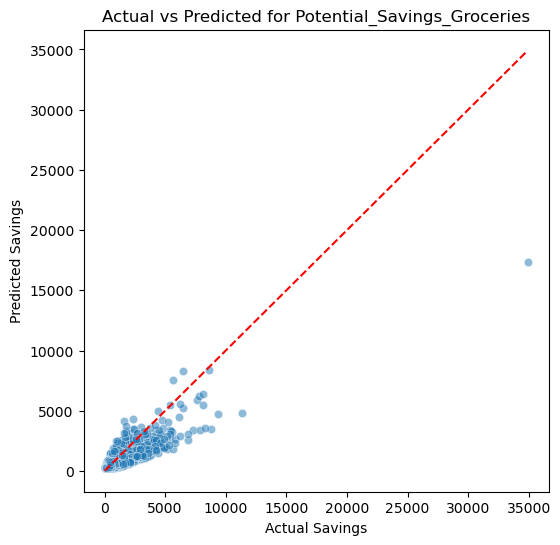

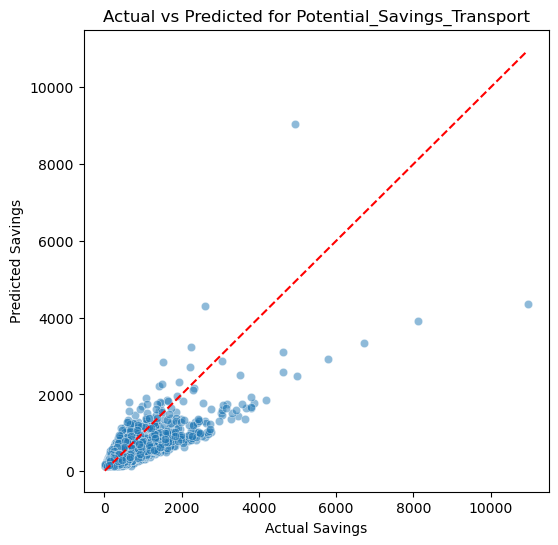

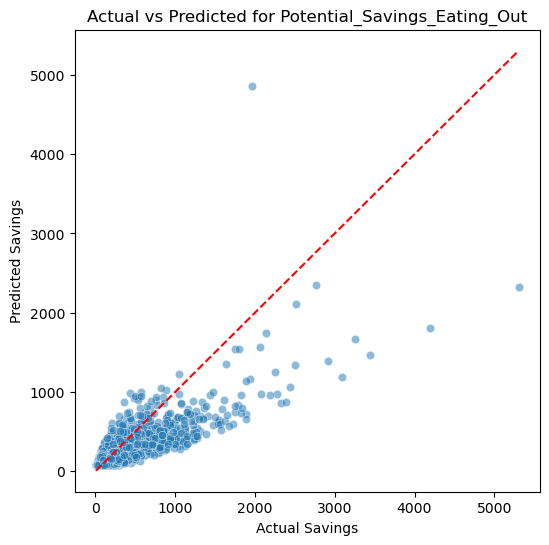

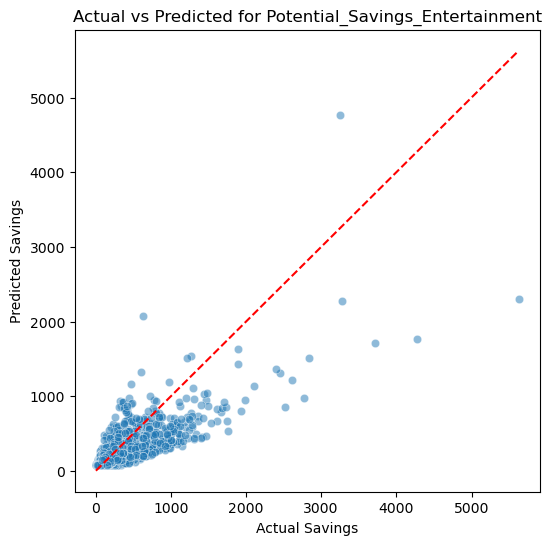

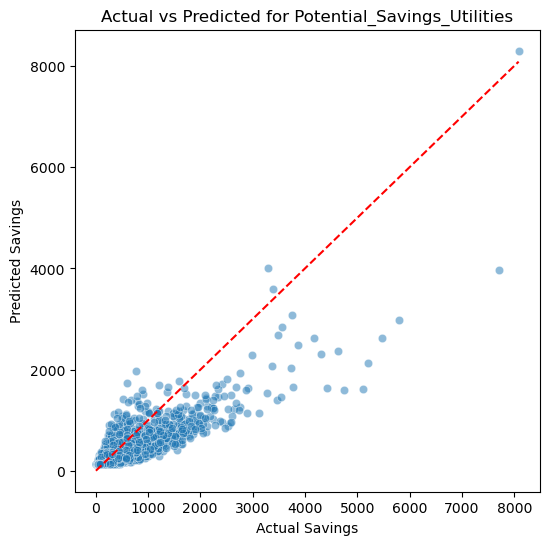

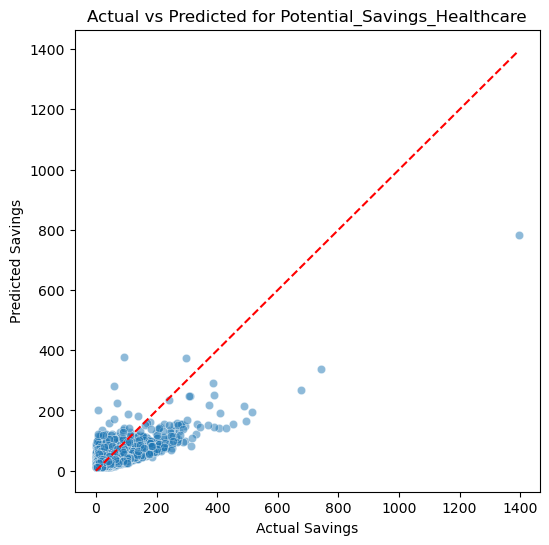

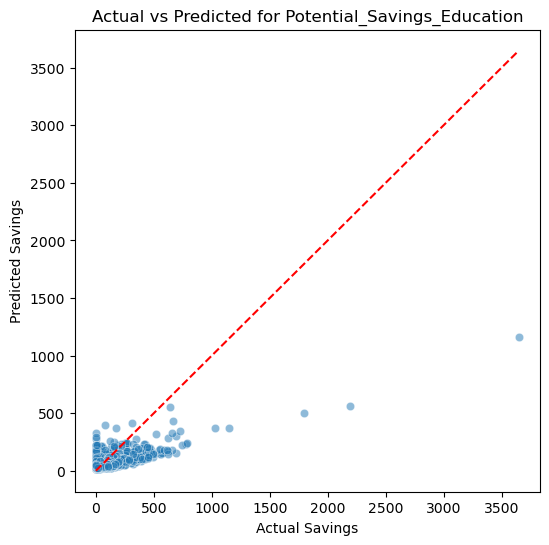

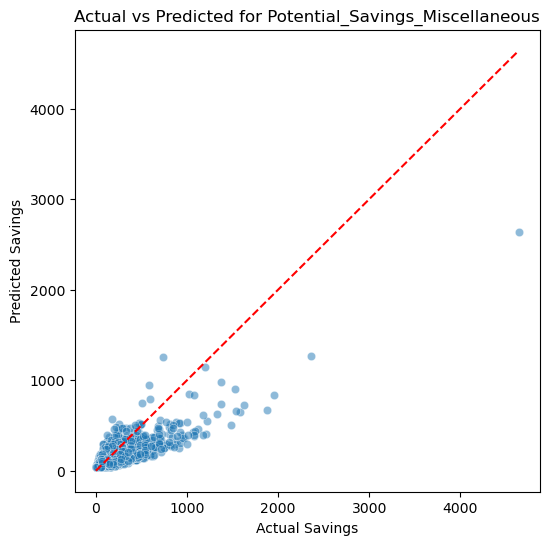

In [138]:
y_pred = model.predict(X_test)

# Convert predictions and actual values to DataFrames for easier handling
y_test_df = pd.DataFrame(y_test, columns=target_columns).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)


for col in target_columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test_df[col], y=y_pred_df[col], alpha=0.5)
    plt.plot([y_test_df[col].min(), y_test_df[col].max()],
             [y_test_df[col].min(), y_test_df[col].max()],
             'r--')  
    plt.title(f'Actual vs Predicted for {col}')
    plt.xlabel('Actual Savings')
    plt.ylabel('Predicted Savings')
    plt.show()

# Prediction Error Distribution

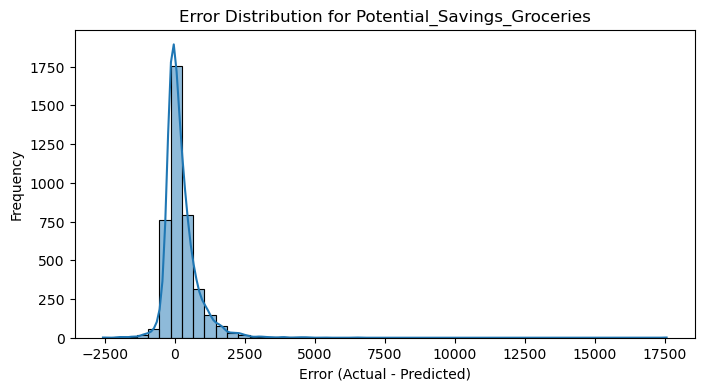

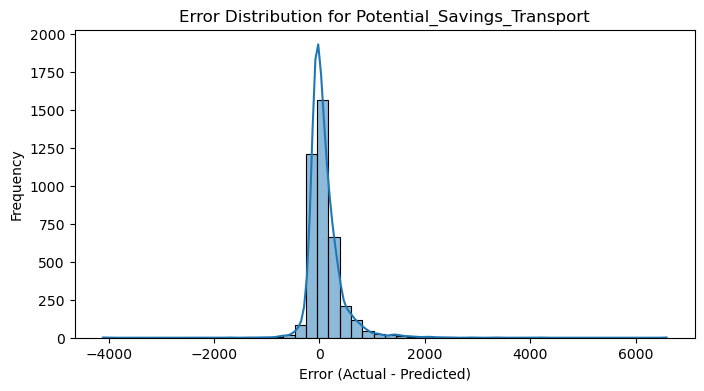

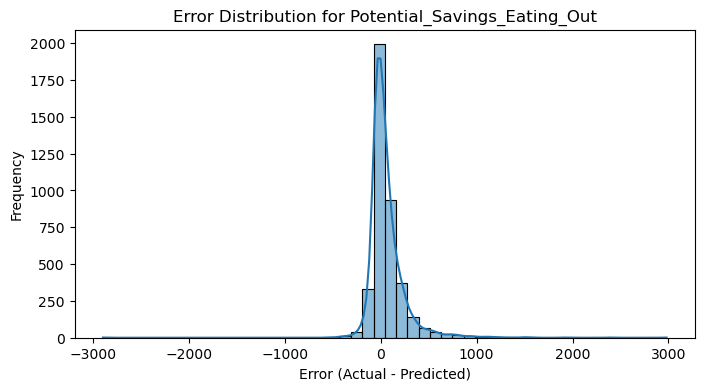

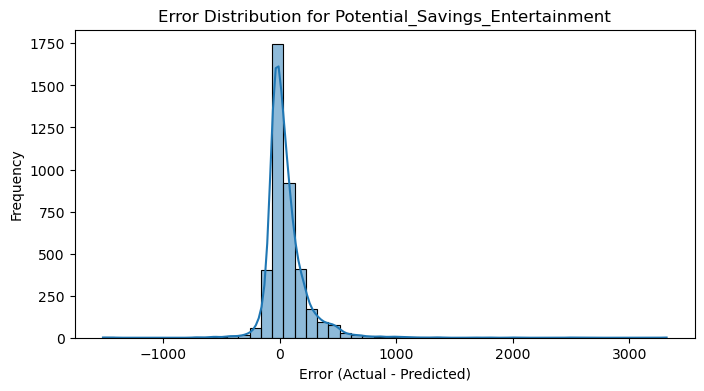

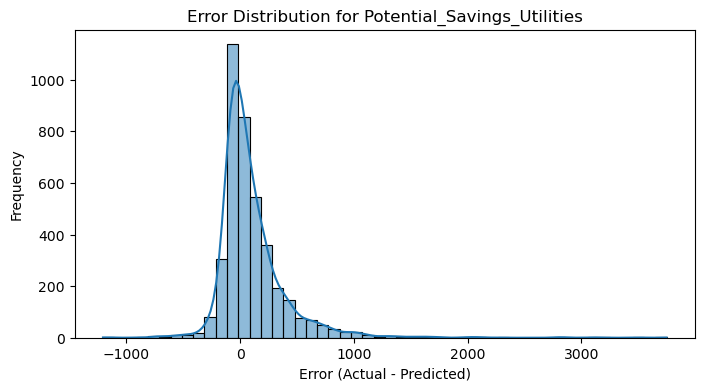

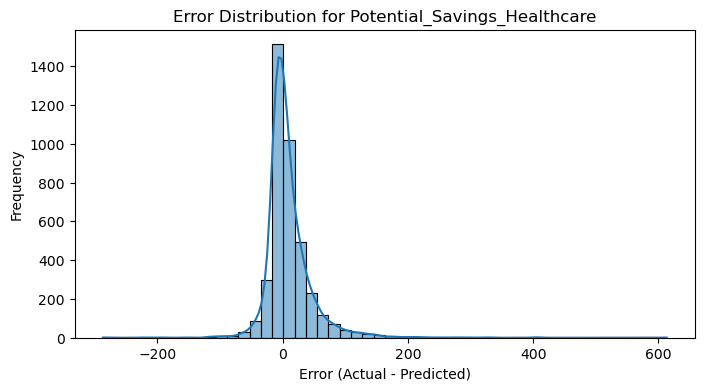

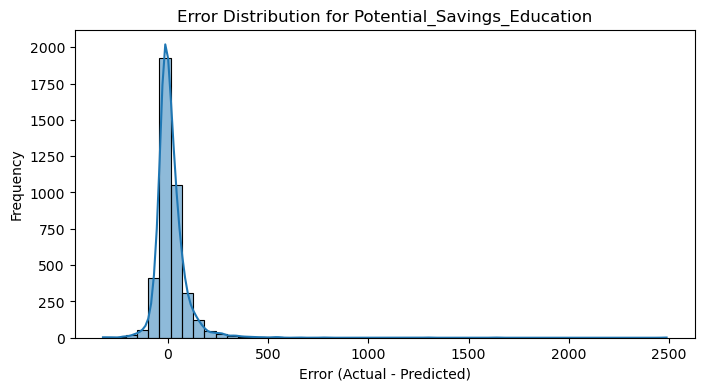

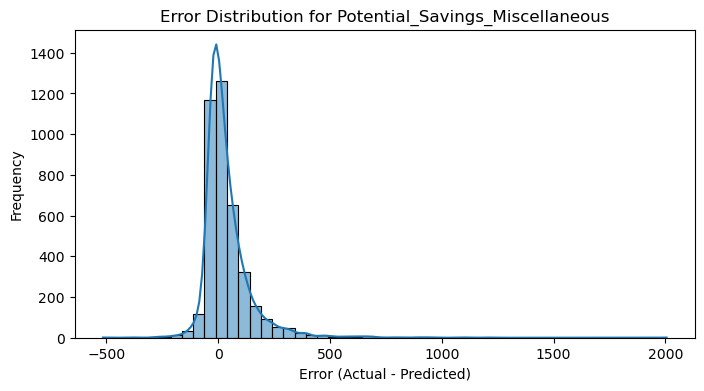

In [139]:
errors = y_test_df - y_pred_df


for col in target_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(errors[col], bins=50, kde=True)
    plt.title(f'Error Distribution for {col}')
    plt.xlabel('Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.show()

# Residual Plots

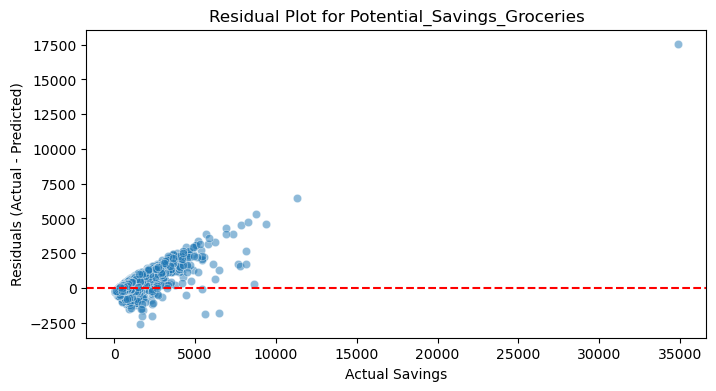

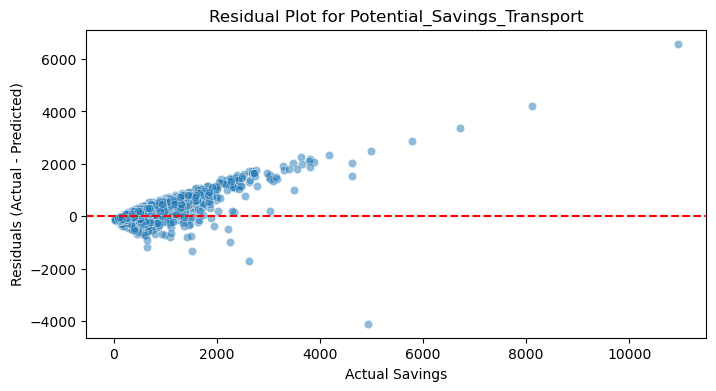

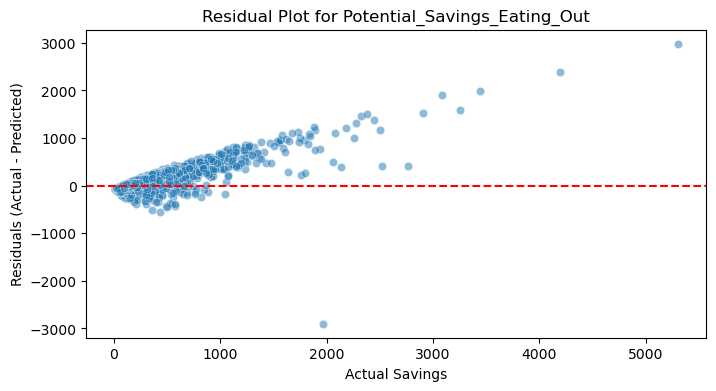

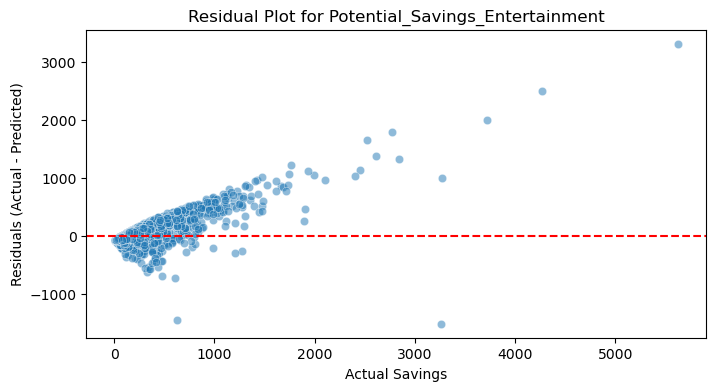

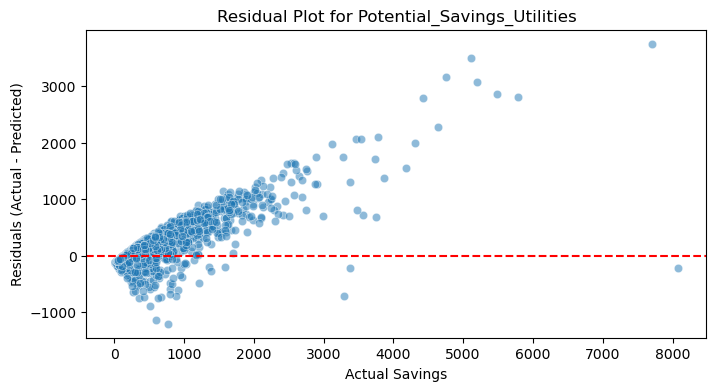

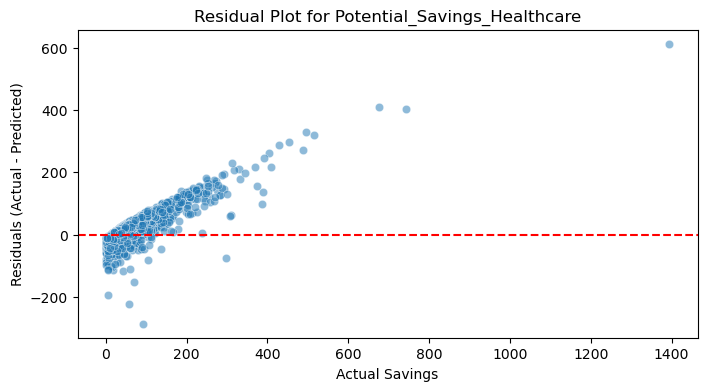

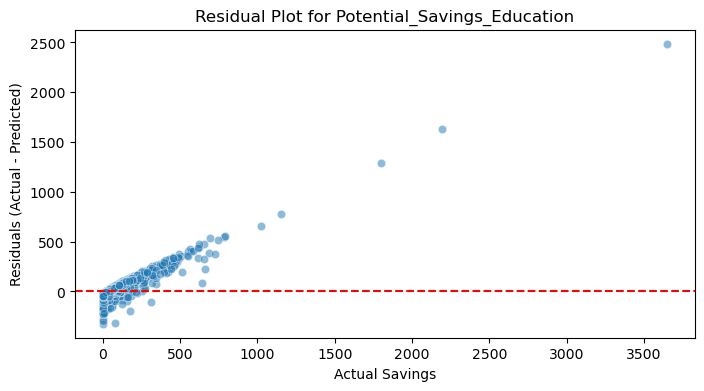

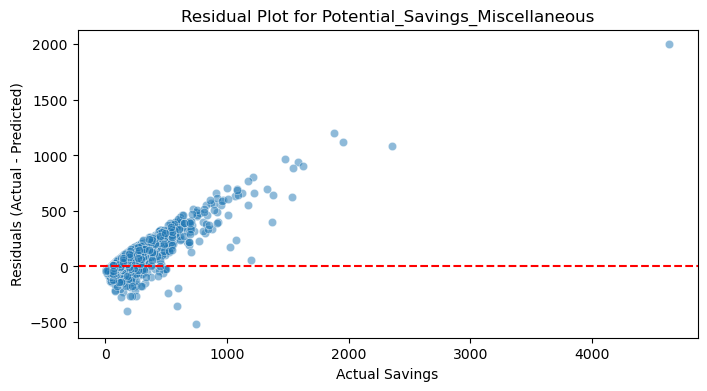

In [140]:
for col in target_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=y_test_df[col], y=errors[col], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual Plot for {col}')
    plt.xlabel('Actual Savings')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.show()

# Correlation Matix of Error

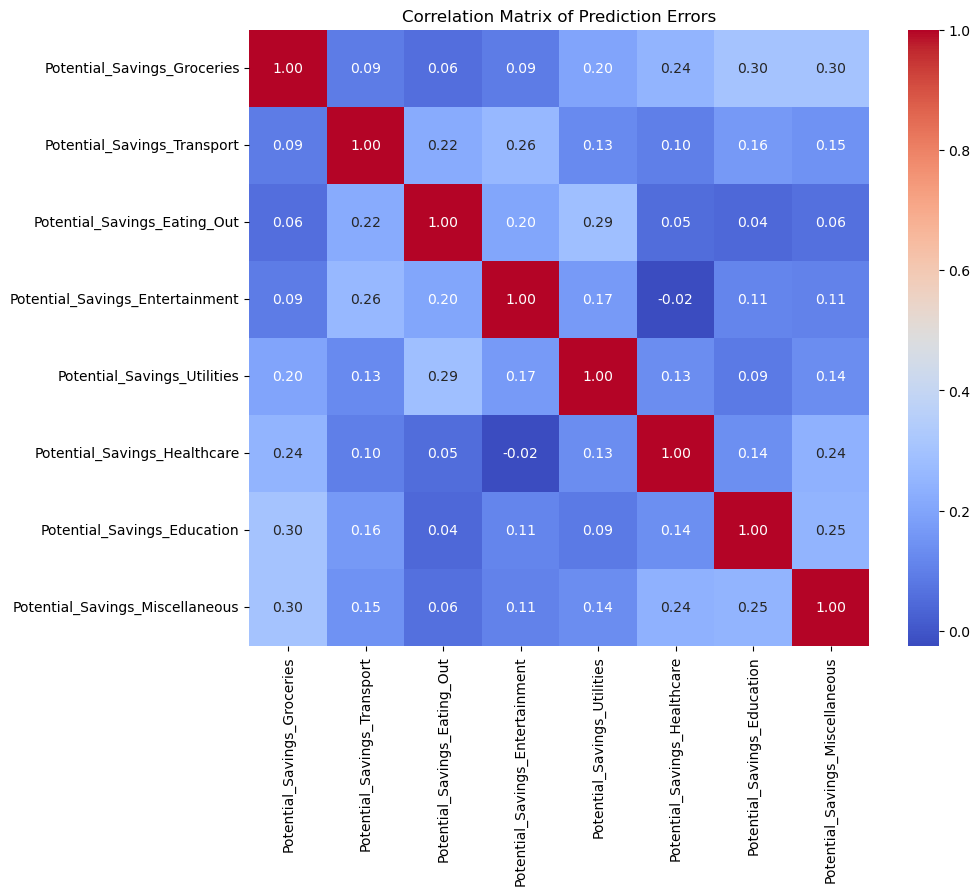

In [141]:
error_corr = errors.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(error_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Prediction Errors')
plt.show()

In [142]:
import joblib

# Save the TensorFlow model
model.save('savings_model.h5')

# Save the preprocessing tools
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']